<a href="https://colab.research.google.com/github/muajnstu/Large_Scale_Implementation_of_DSK_Chain/blob/main/Hotel_data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading the dataset and importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/muajnstu/ML-Datasets/refs/heads/main/hotel_booking.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


1. Basic cleaning

In [5]:
df = df.drop(columns=['name', 'email', 'phone-number', 'credit_card'], errors='ignore')

print("DataFrame shape after dropping identifier columns:", df.shape)

DataFrame shape after dropping identifier columns: (119390, 32)


In [6]:
missing_per_column = df.isnull().sum()
print("Missing values per column:")
print(missing_per_column)

print("Total missing values in all columns:", missing_per_column.sum())

missing_per_row = df.isnull().sum(axis=1)
print("Missing values per row:")
print(missing_per_row)

print("Total missing values in all rows:", missing_per_row.sum())

# Total missing values in the dataset
total_missing = df.isnull().sum().sum()
print("Total missing values in the dataset:", total_missing)

Missing values per column:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                         

In [7]:
#missing values are replaced with appropriate values and company column dropped due to 95% missing values(run it only one time after loading the dataset)
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['agent'] = df['agent'].fillna(0).astype(int)
df = df.drop('company', axis=1)

print("Missing values per column:\n", df.isnull().sum())
print("\nTotal missing values in all columns:", df.isnull().sum().sum())

Missing values per column:
 hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0


In [8]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Duplicate rows (True means duplicate):")
print(duplicate_rows)

total_duplicates = duplicate_rows.sum()
print("Total number of duplicate rows:", total_duplicates)

Duplicate rows (True means duplicate):
0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool
Total number of duplicate rows: 32020


In [9]:
# Remove duplicate rows
df = df.drop_duplicates()

print("DataFrame shape after removing duplicates:", df.shape)
display(df.head())

# Recalculate and print the total number of duplicate rows after dropping
total_duplicates_after_drop = df.duplicated().sum()
print("Total number of duplicate rows after dropping:", total_duplicates_after_drop)

DataFrame shape after removing duplicates: (87370, 31)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03


Total number of duplicate rows after dropping: 0


In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", list(categorical_cols))
print("Numerical columns:", list(numerical_cols))

# Check for unique values in each column
print("\nNumber of unique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Categorical columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
Numerical columns: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

Number of unique values in each column:
hotel: 2
is_canceled: 2
lead_time: 479
arrival_date_year: 3
arrival_date_month: 12
arrival_date_week_number: 53
arrival_date_day_of_month: 31
stays_in_weekend_nights: 17
stays_in_week_nights: 35
adults: 14
children: 5
babies: 5
meal: 5
country: 177
market_segment: 8
distribution_channel: 5
is_repeated_guest: 

2. Features Visualization

Categorical columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
Numerical columns: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

Visualizing Numerical Features (Histograms):


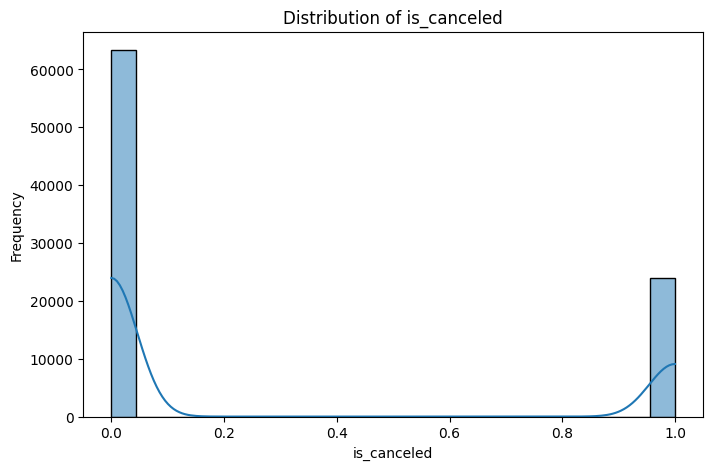

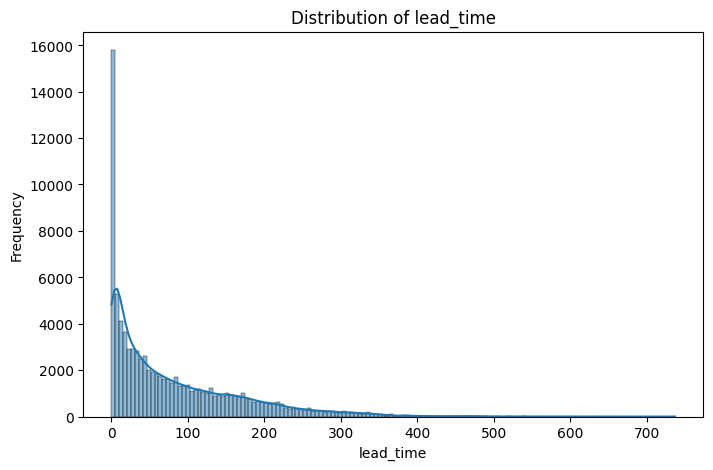

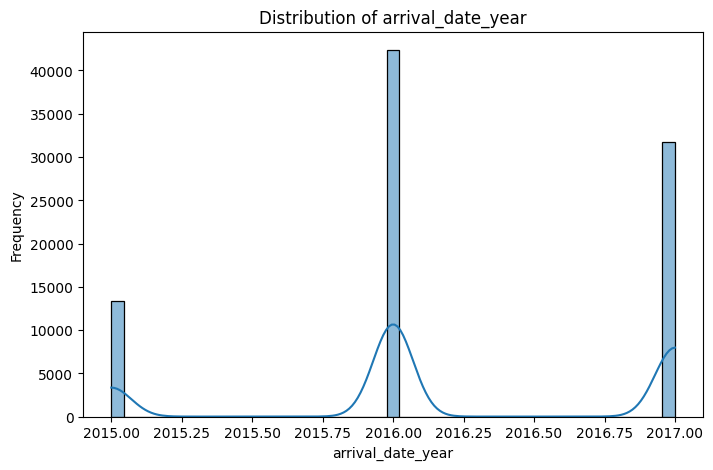

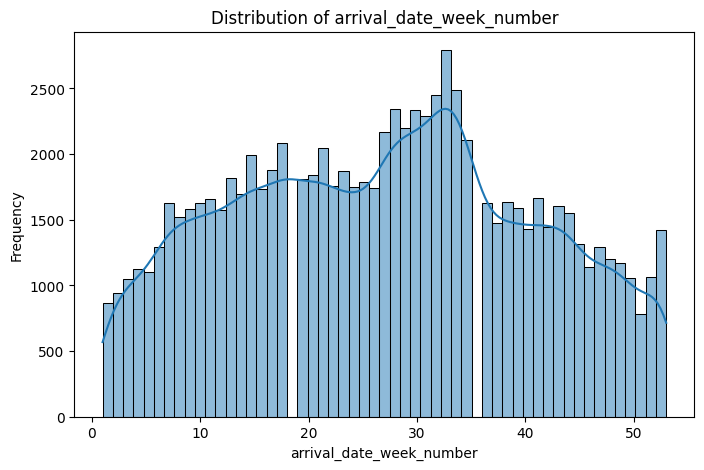

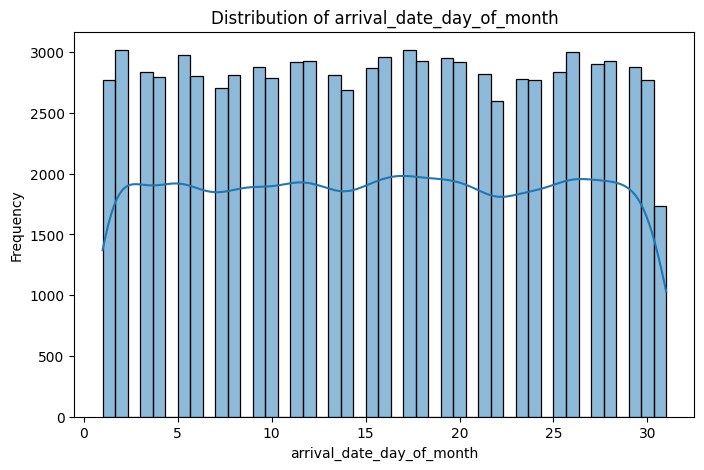

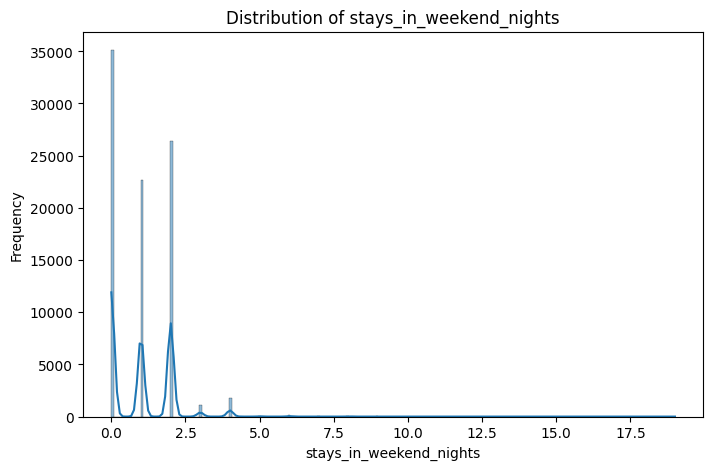

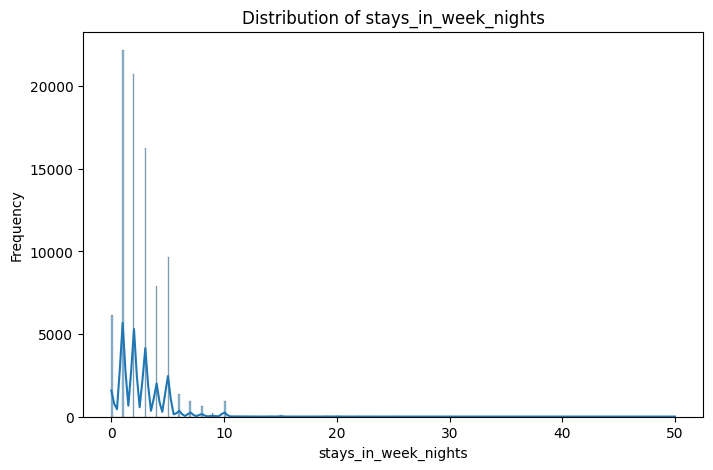

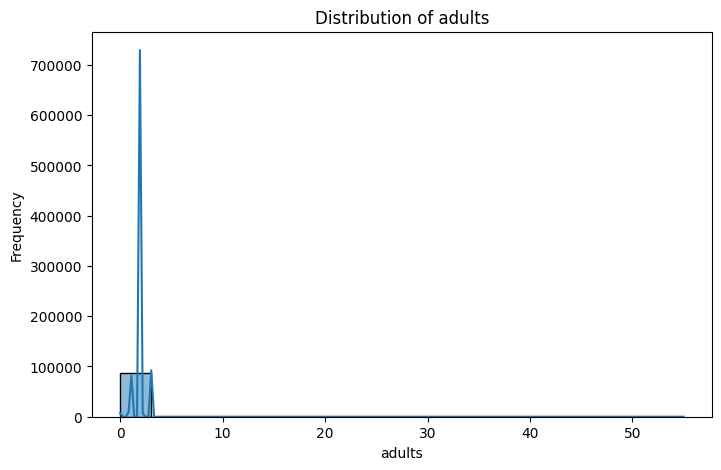

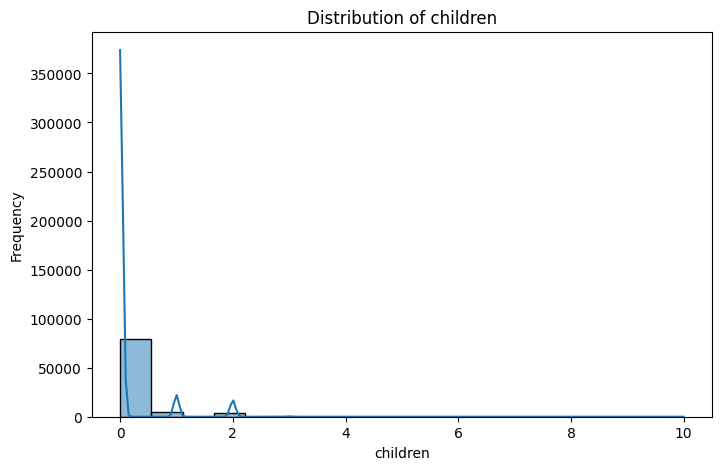

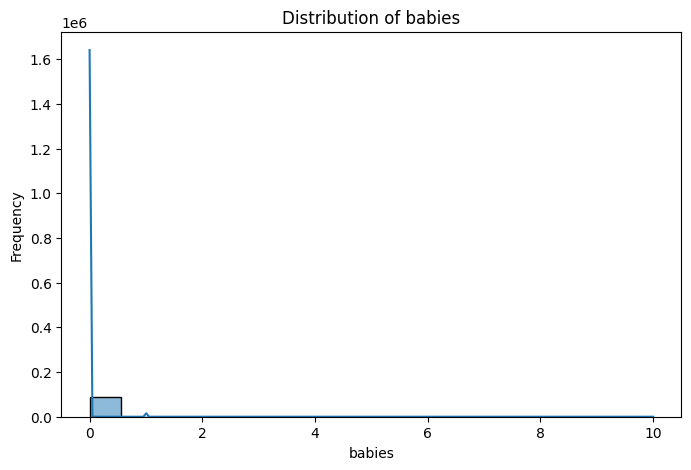

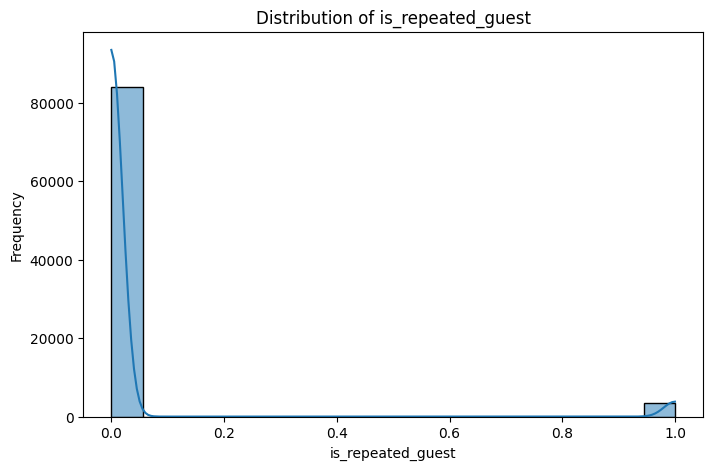

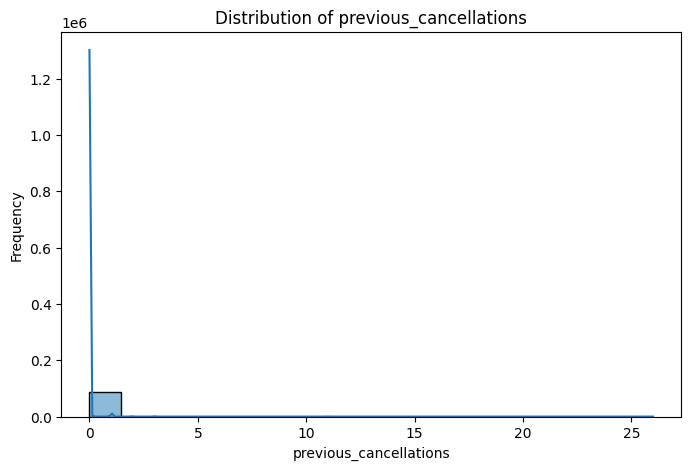

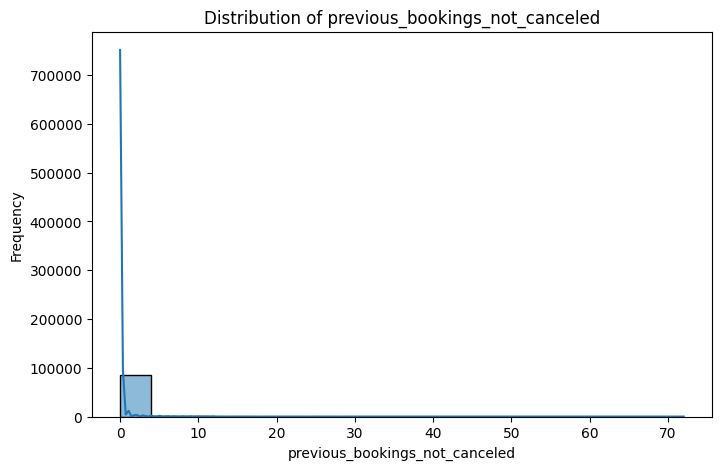

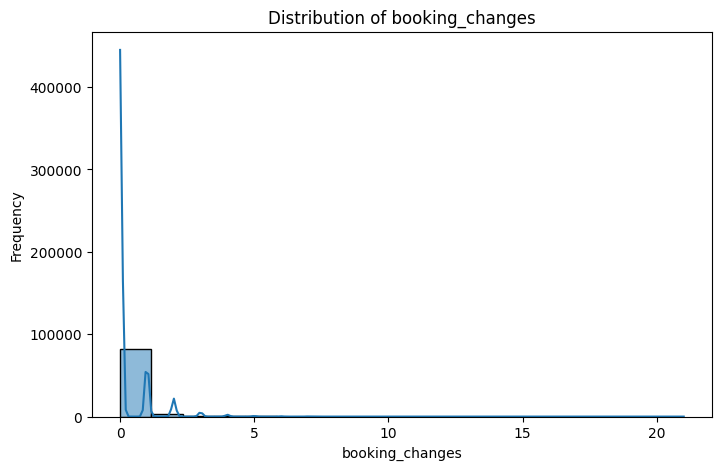

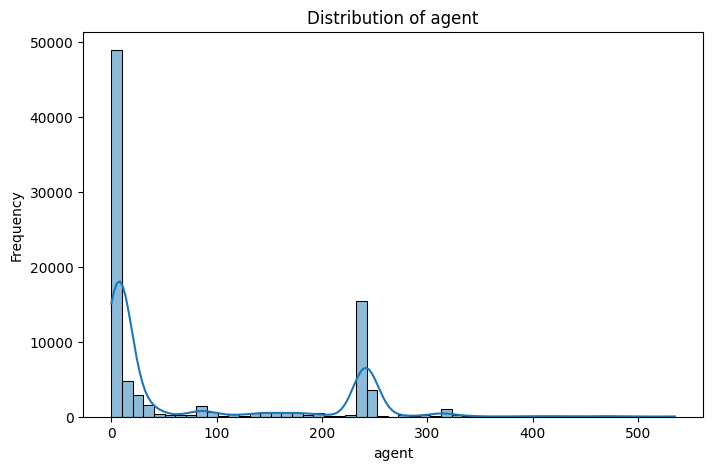

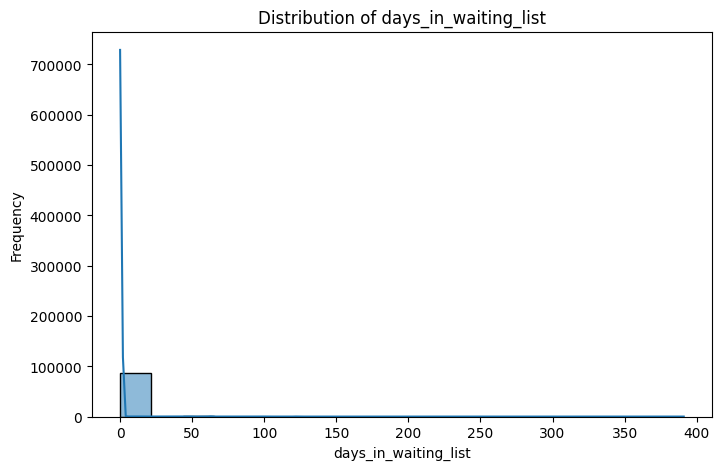

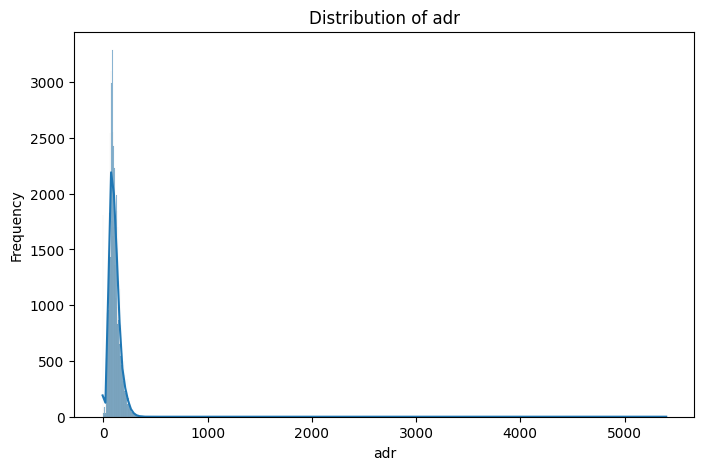

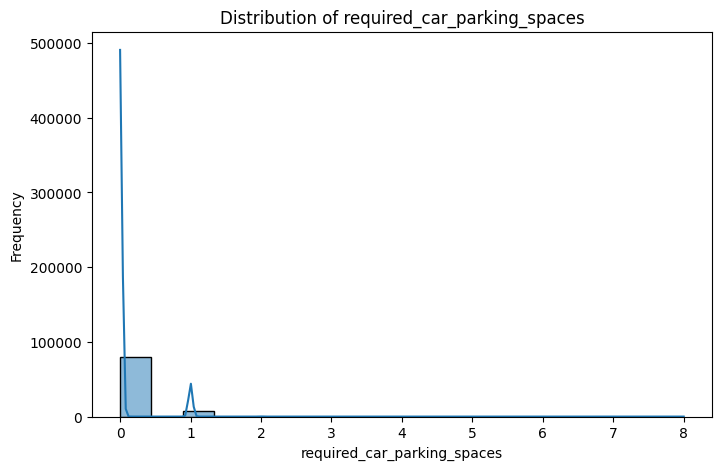

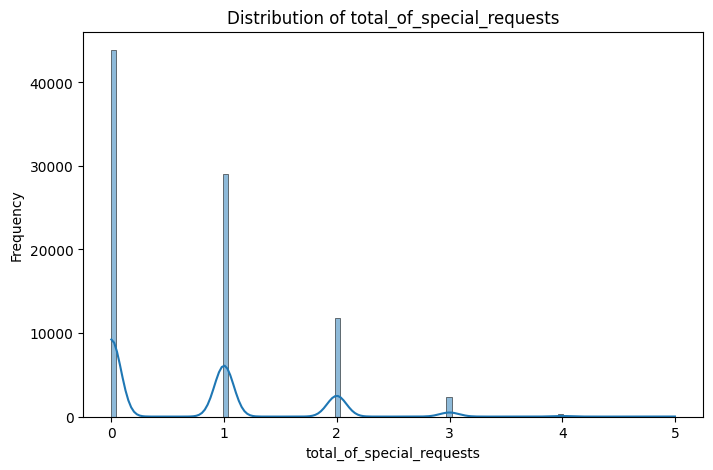

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", list(categorical_cols))
print("Numerical columns:", list(numerical_cols))

# Visualize Numerical Features with Histograms
print("\nVisualizing Numerical Features (Histograms):")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Visualizing Categorical Features (Bar Plots):


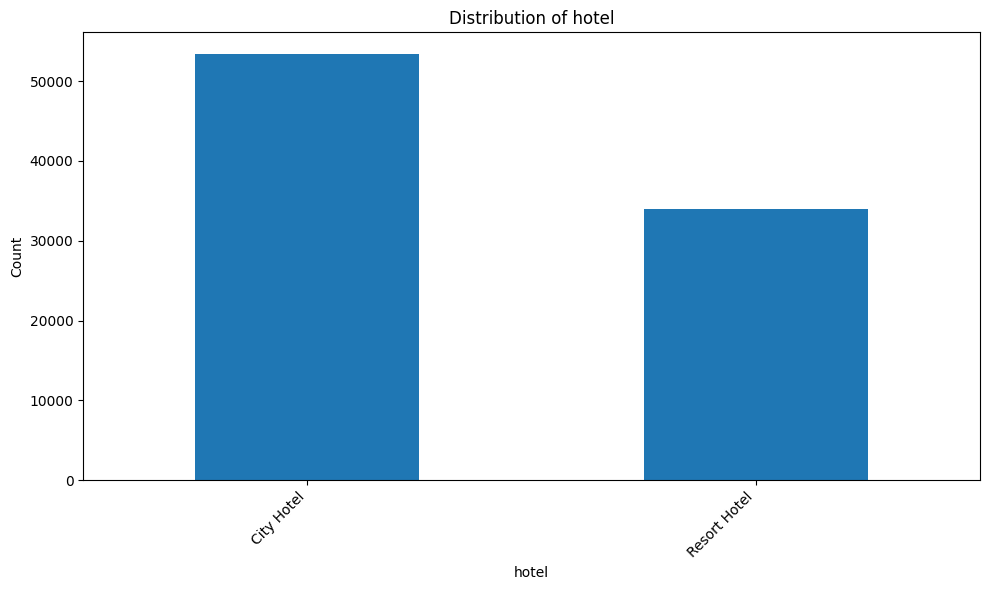

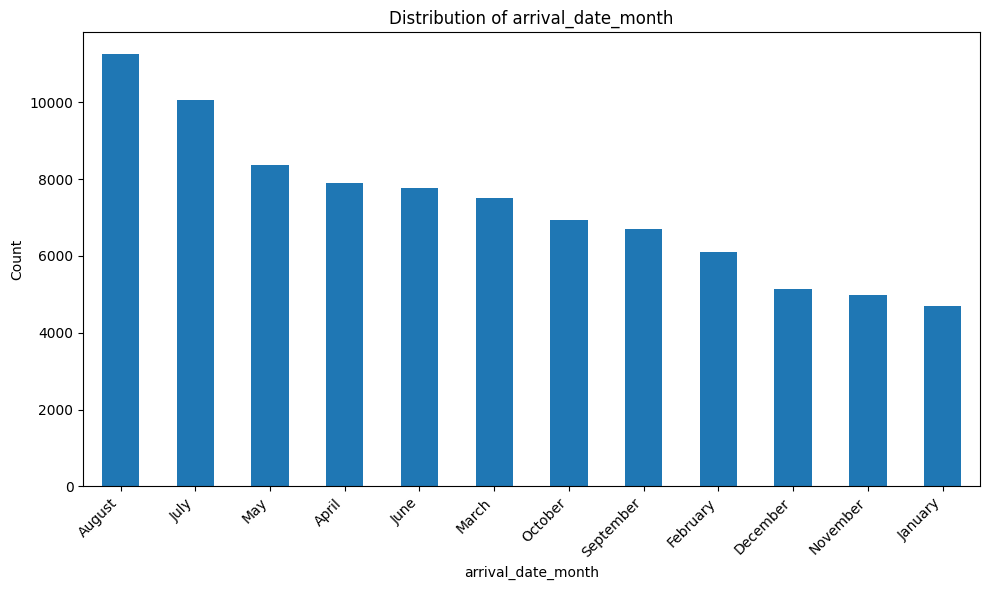

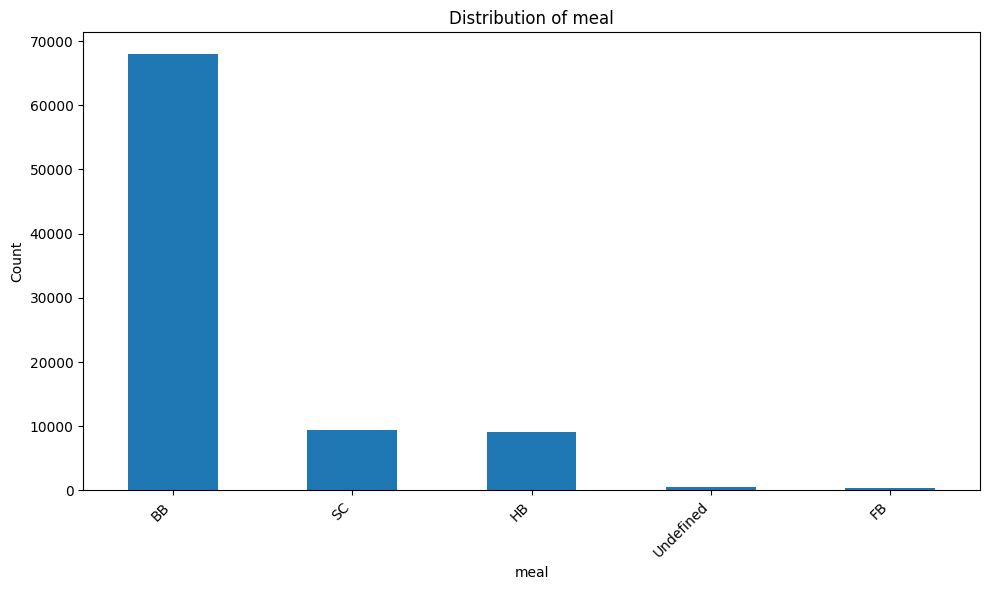

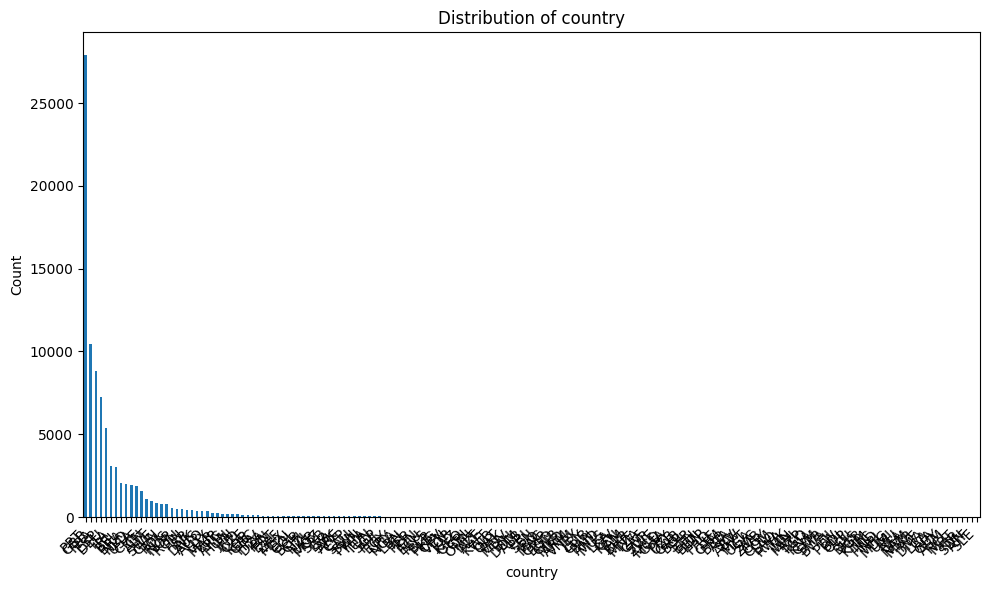

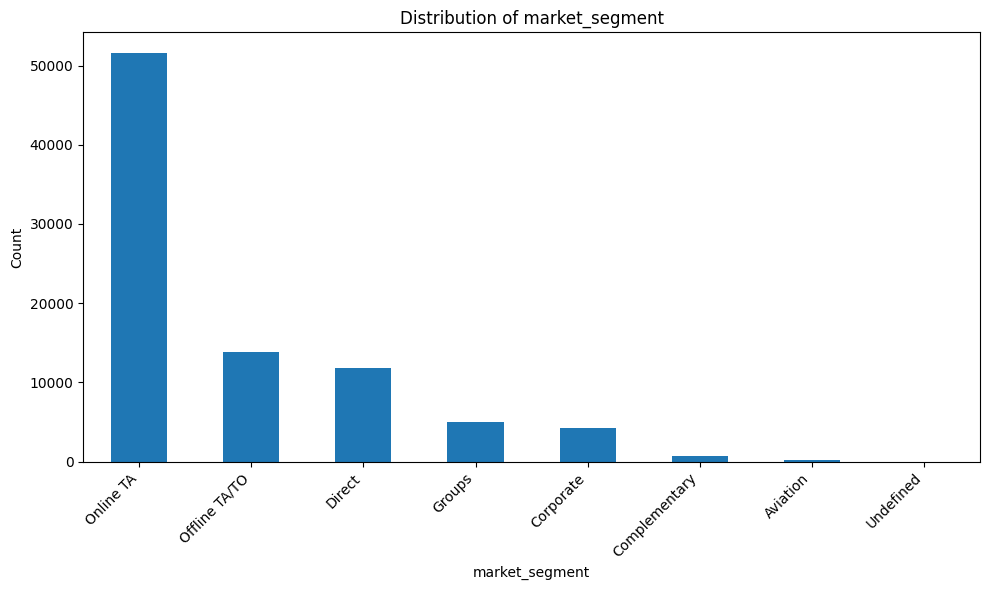

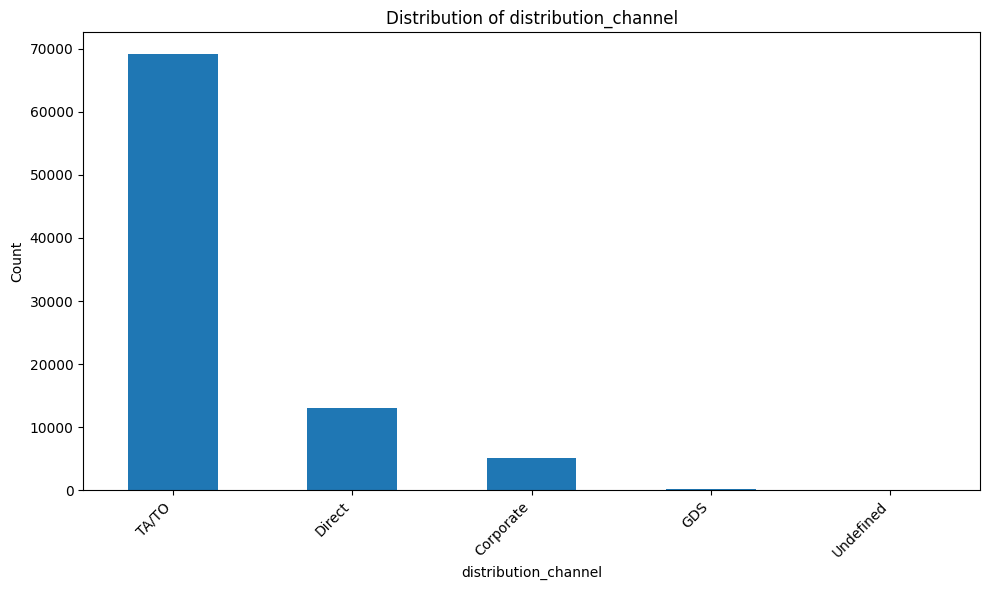

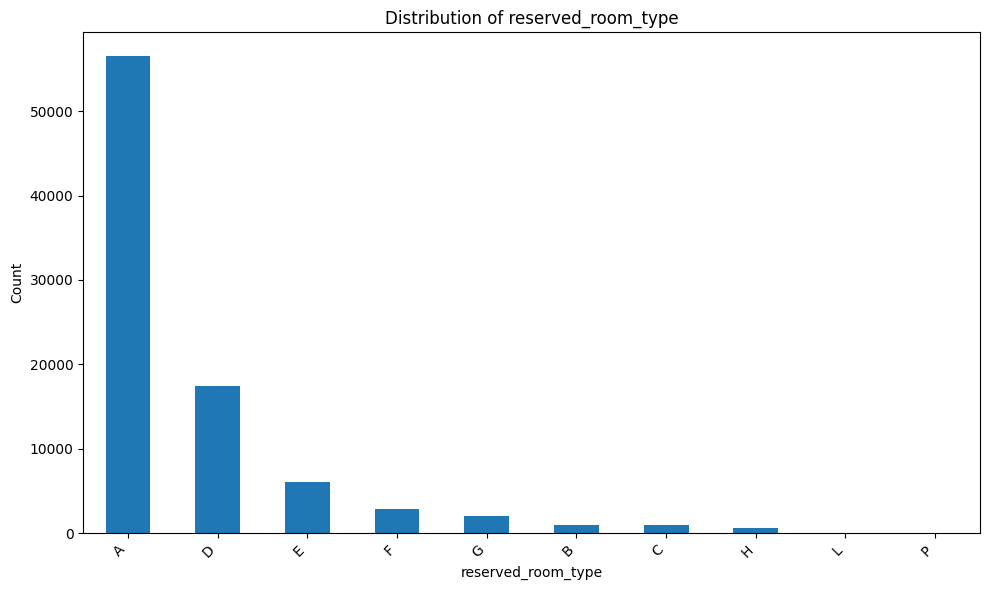

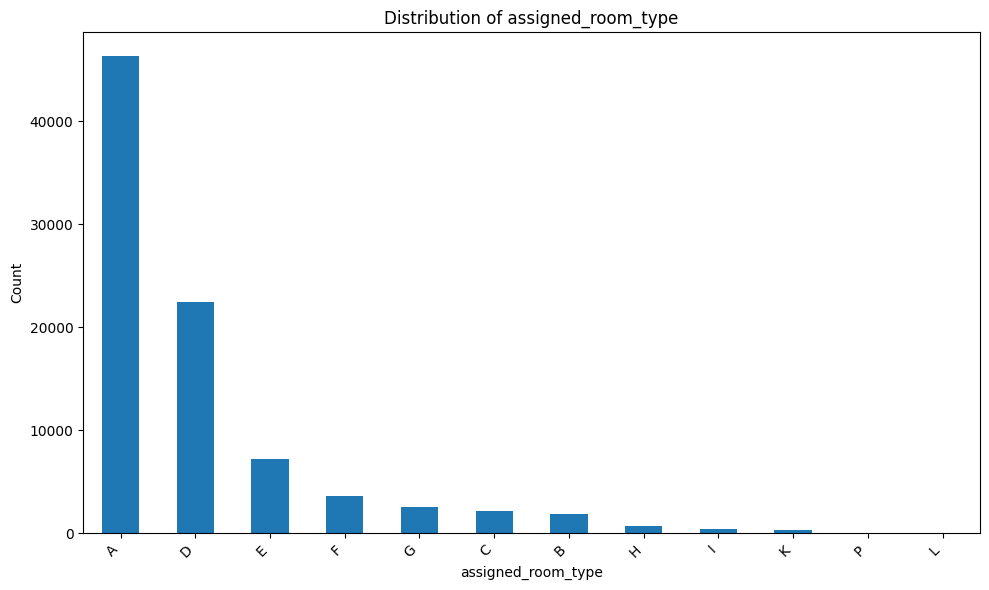

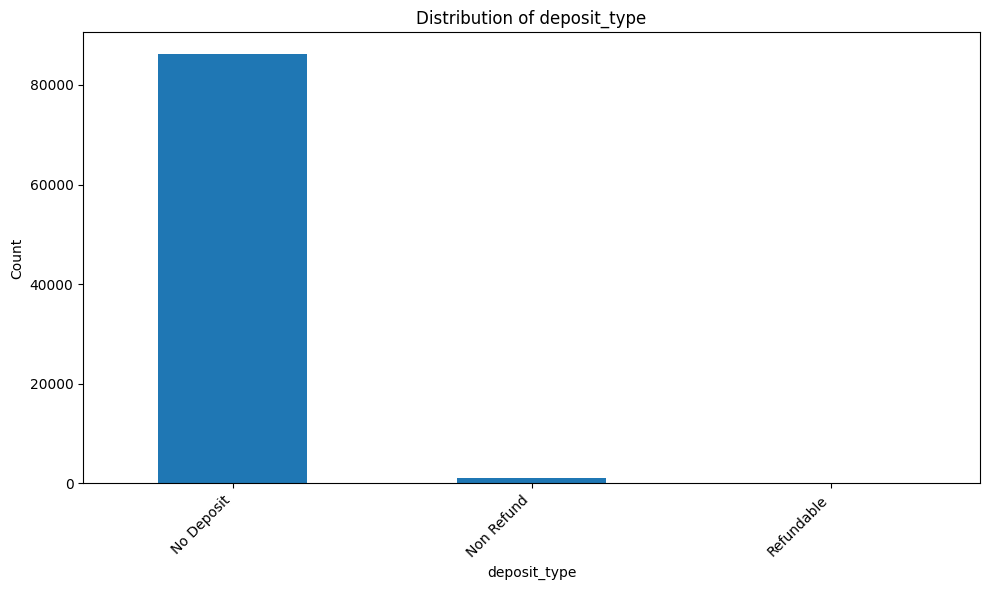

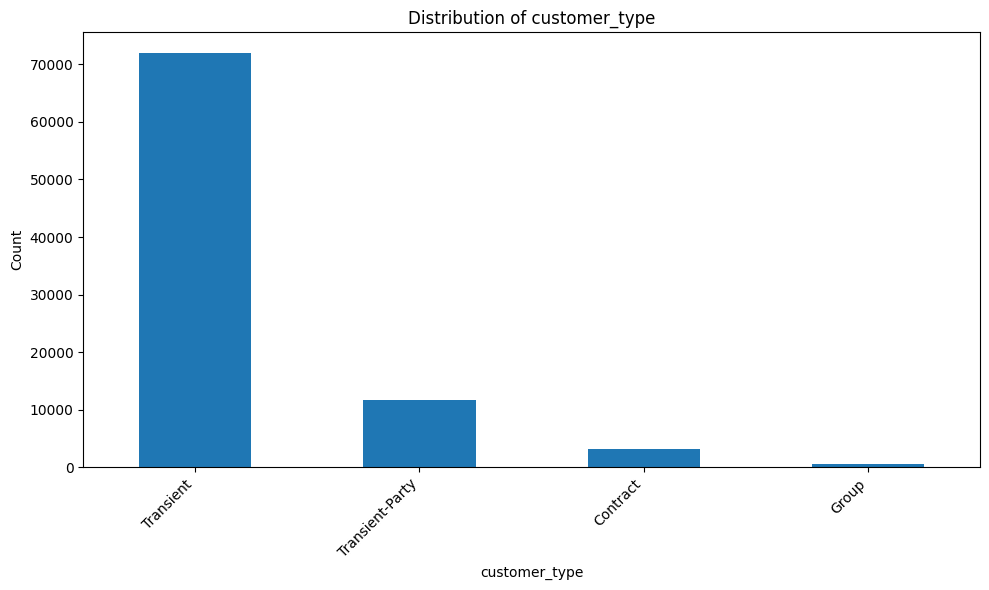

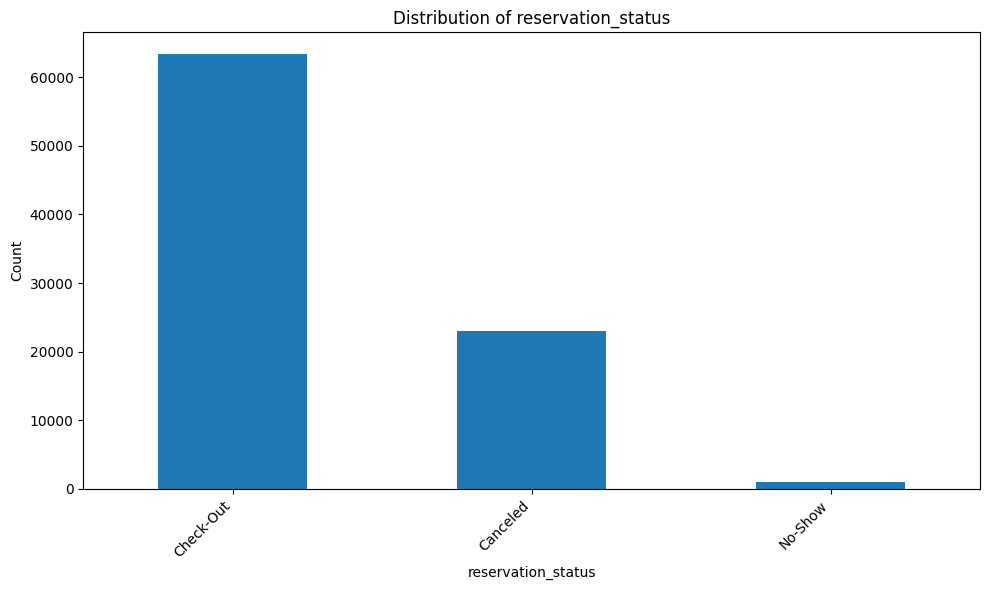

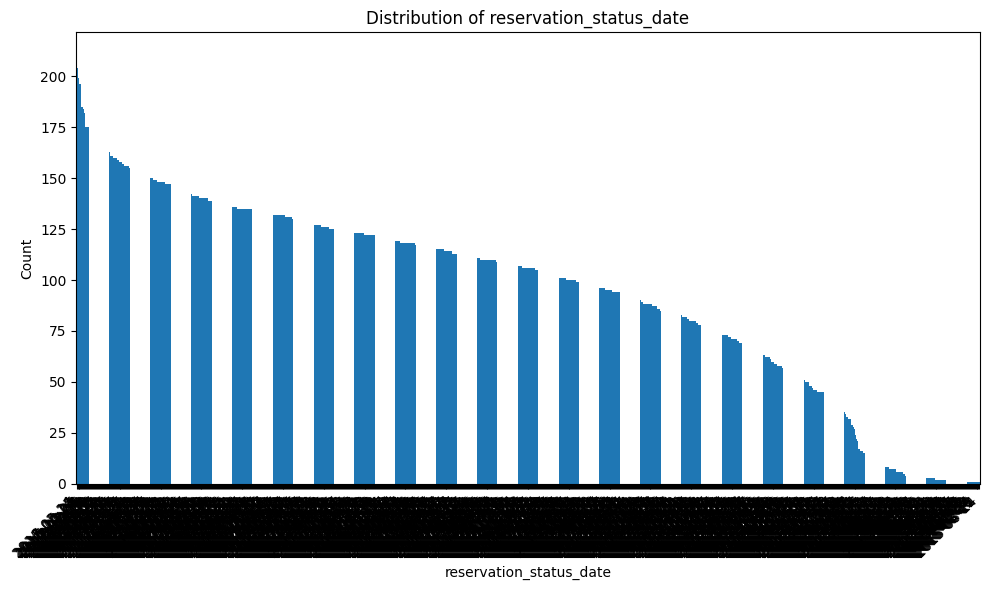

In [12]:
print("\nVisualizing Categorical Features (Bar Plots):")
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

3.Encoding

In [13]:
# Apply manual mapping to selected categorical columns
df_encoded = df.copy() # Starting with a fresh copy of the DataFrame
meal_mapping = {'SC': 0, 'Undefined': 0, 'BB': 1, 'HB': 2, 'FB': 3}
df_encoded['meal'] = df_encoded['meal'].map(meal_mapping)

# Mapping Deposit Type
deposit_mapping = {'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2} # Example mapping, adjust order based on domain knowledge if needed
df_encoded['deposit_type'] = df_encoded['deposit_type'].map(deposit_mapping)

# Mapping Reservation Status (Example mapping - order may need domain knowledge)
reservation_status_mapping = {'Canceled': 0, 'Check-Out': 1, 'No-Show': 2}
df_encoded['reservation_status'] = df_encoded['reservation_status'].map(reservation_status_mapping)

# Mapping Customer Type (Example mapping - order may need domain knowledge)
customer_type_mapping = {'Transient': 0, 'Transient-Party': 1, 'Group': 2, 'Contract': 3}
df_encoded['customer_type'] = df_encoded['customer_type'].map(customer_type_mapping)


# Assuming 'is_canceled' is the target variable for Target Encoding
target_variable = 'is_canceled'

# Calculate the mean of the target for each country
country_target_mean = df_encoded.groupby('country')[target_variable].mean()

# Apply Target Encoding to the 'country' column
df_encoded['country_encoded'] = df_encoded['country'].map(country_target_mean)

# Drop the original 'country' column after target encoding
df_encoded = df_encoded.drop(columns=['country'], errors='ignore')

# Drop the identifier columns (handled in a previous cell but keeping for completeness)
columns_to_drop = ['name', 'email', 'phone-number', 'credit_card']
df_encoded = df_encoded.drop(columns=columns_to_drop, errors='ignore')


# Apply Frequency Encoding to specified columns
frequency_encoded_cols = ['reserved_room_type', 'assigned_room_type', 'arrival_date_month']
for col in frequency_encoded_cols:
    freq_encoding = df_encoded[col].value_counts(normalize=True)
    df_encoded[f'{col}_freq_encoded'] = df_encoded[col].map(freq_encoding)

# Drop original frequency encoded columns
df_encoded = df_encoded.drop(columns=frequency_encoded_cols, errors='ignore')


# Apply One-Hot Encoding to 'market_segment'
df_encoded = pd.get_dummies(df_encoded, columns=['market_segment'], prefix='market_segment')


# Apply One-Hot Encoding to remaining selected categorical columns (only 'hotel' remains from the previous list)
categorical_cols_to_encode_remaining = ['hotel']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols_to_encode_remaining, drop_first=True)

# Drop original one-hot encoded columns that were not already dropped
original_one_hot_cols_to_drop = ['market_segment', 'hotel']
df_encoded = df_encoded.drop(columns=original_one_hot_cols_to_drop, errors='ignore')

# Apply Ordinal Encoding to 'distribution_channel'
distribution_channel_mapping = {channel: i for i, channel in enumerate(df_encoded['distribution_channel'].unique())}
df_encoded['distribution_channel_encoded'] = df_encoded['distribution_channel'].map(distribution_channel_mapping)

# Drop the original 'distribution_channel' column
df_encoded = df_encoded.drop(columns=['distribution_channel'], errors='ignore')


print("Encoded DataFrame shape after all encoding and dropping:", df_encoded.shape)
display(df_encoded.head())

Encoded DataFrame shape after all encoding and dropping: (87370, 38)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,hotel_Resort Hotel,distribution_channel_encoded
0,0,342,2015,27,1,0,0,2,0.0,0,...,False,False,False,True,False,False,False,False,True,0
1,0,737,2015,27,1,0,0,2,0.0,0,...,False,False,False,True,False,False,False,False,True,0
2,0,7,2015,27,1,0,1,1,0.0,0,...,False,False,False,True,False,False,False,False,True,0
3,0,13,2015,27,1,0,1,1,0.0,0,...,False,False,True,False,False,False,False,False,True,1
4,0,14,2015,27,1,0,2,2,0.0,0,...,False,False,False,False,False,False,True,False,True,2


In [14]:
# Convert boolean columns to integers (0s and 1s)
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)

print("DataFrame after converting boolean columns to integers:", df_encoded.shape)
display(df_encoded.head())

DataFrame after converting boolean columns to integers: (87370, 38)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,hotel_Resort Hotel,distribution_channel_encoded
0,0,342,2015,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,2015,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,1,0,0,0,0,0,1,1
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,1,0,1,2


In [15]:
df_encoded = df_encoded.drop(columns=['reservation_status_date'], errors='ignore')

# Convert 'hotel_Resort Hotel' from boolean to integer (0 or 1)
if 'hotel_Resort Hotel' in df_encoded.columns and df_encoded['hotel_Resort Hotel'].dtype == 'bool':
    df_encoded['hotel_Resort Hotel'] = df_encoded['hotel_Resort Hotel'].astype(int)


print("DataFrame shape after dropping date columns and converting boolean:", df_encoded.shape)
display(df_encoded.head())

DataFrame shape after dropping date columns and converting boolean: (87370, 37)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,hotel_Resort Hotel,distribution_channel_encoded
0,0,342,2015,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,2015,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,1,0,0,0,0,0,1,1
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,1,0,1,2


In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87370 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   is_canceled                      87370 non-null  int64  
 1   lead_time                        87370 non-null  int64  
 2   arrival_date_year                87370 non-null  int64  
 3   arrival_date_week_number         87370 non-null  int64  
 4   arrival_date_day_of_month        87370 non-null  int64  
 5   stays_in_weekend_nights          87370 non-null  int64  
 6   stays_in_week_nights             87370 non-null  int64  
 7   adults                           87370 non-null  int64  
 8   children                         87370 non-null  float64
 9   babies                           87370 non-null  int64  
 10  meal                             87370 non-null  int64  
 11  is_repeated_guest                87370 non-null  int64  
 12  previous_cancellations

**Pearson or Spearman Correlation Heatmap**

Feature pairs with absolute Spearman correlation greater than 0.8:
reservation_status and is_canceled: -0.91
distribution_channel_encoded and market_segment_Direct: -0.80


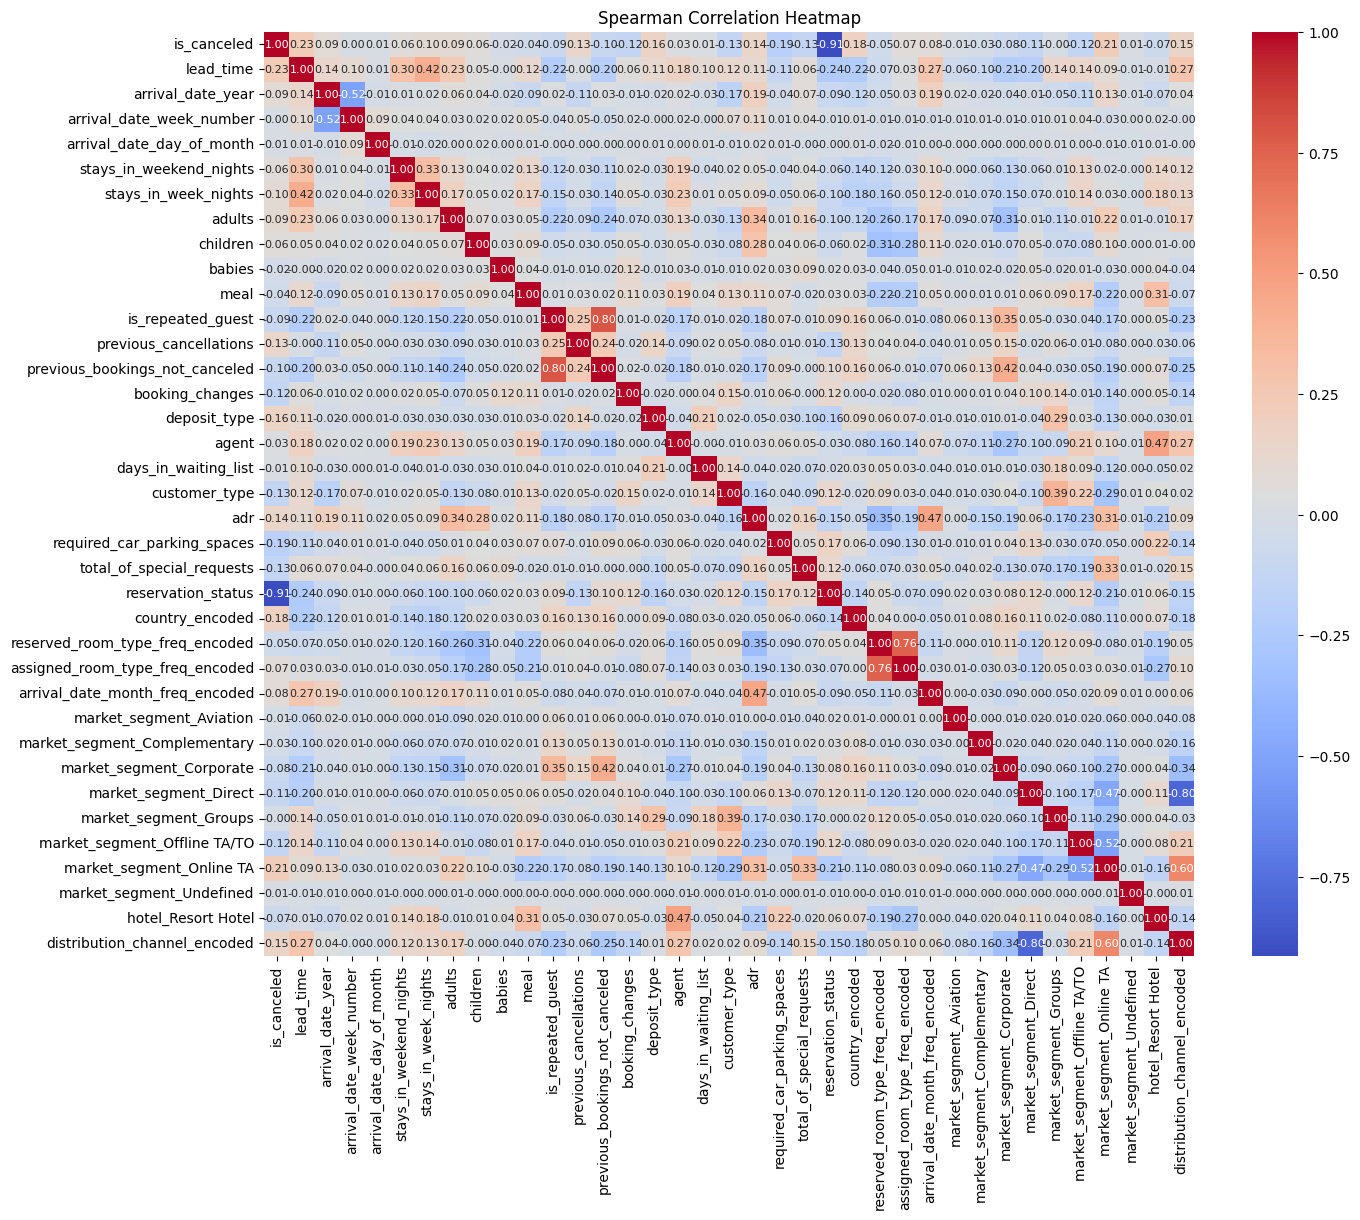

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the Spearman correlation matrix for the encoded dataframe
correlation_matrix = df_encoded.corr(method='spearman', numeric_only=True)

# Identify feature pairs with absolute correlation greater than 0.8 (excluding self-correlation)
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_pairs.append((colname_i, colname_j, correlation_matrix.iloc[i, j]))

print("Feature pairs with absolute Spearman correlation greater than 0.8:")
for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

# Plot the correlation heatmap
plt.figure(figsize=(15, 12)) # Reduced figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 8})
plt.title('Spearman Correlation Heatmap')
plt.show()

In [18]:
# Drop one of the highly correlated features from each pair
df_encoded = df_encoded.drop(columns=['reservation_status', 'market_segment_Direct'])

print("DataFrame shape after dropping highly correlated features:", df_encoded.shape)
display(df_encoded.head())

DataFrame shape after dropping highly correlated features: (87370, 35)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,arrival_date_month_freq_encoded,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,hotel_Resort Hotel,distribution_channel_encoded
0,0,342,2015,27,1,0,0,2,0.0,0,...,0.115085,0,0,0,0,0,0,0,1,0
1,0,737,2015,27,1,0,0,2,0.0,0,...,0.115085,0,0,0,0,0,0,0,1,0
2,0,7,2015,27,1,0,1,1,0.0,0,...,0.115085,0,0,0,0,0,0,0,1,0
3,0,13,2015,27,1,0,1,1,0.0,0,...,0.115085,0,0,1,0,0,0,0,1,1
4,0,14,2015,27,1,0,2,2,0.0,0,...,0.115085,0,0,0,0,0,1,0,1,2


In [19]:
variances = df_encoded.var()

# Identify columns with variance less than 0.01
low_variance_cols = variances[variances < 0.01].index.tolist()

print("Columns with variance less than 0.01:")
print(low_variance_cols)

# Drop low variance columns
df_encoded = df_encoded.drop(columns=low_variance_cols, errors='ignore')

print("\nDataFrame shape after dropping low variance features:", df_encoded.shape)
display(df_encoded.head())

Columns with variance less than 0.01:
['country_encoded', 'arrival_date_month_freq_encoded', 'market_segment_Aviation', 'market_segment_Complementary', 'market_segment_Undefined']

DataFrame shape after dropping low variance features: (87370, 30)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,required_car_parking_spaces,total_of_special_requests,reserved_room_type_freq_encoded,assigned_room_type_freq_encoded,market_segment_Corporate,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,hotel_Resort Hotel,distribution_channel_encoded
0,0,342,2015,27,1,0,0,2,0.0,0,...,0,0,0.010473,0.024780,0,0,0,0,1,0
1,0,737,2015,27,1,0,0,2,0.0,0,...,0,0,0.010473,0.024780,0,0,0,0,1,0
2,0,7,2015,27,1,0,1,1,0.0,0,...,0,0,0.647018,0.024780,0,0,0,0,1,0
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,0.647018,0.529942,1,0,0,0,1,1
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,1,0.647018,0.529942,0,0,0,1,1,2


In [20]:
df_encoded.to_csv('hotel_booking_processed.csv', index=False)

print("Processed DataFrame saved to 'hotel_booking_processed.csv'")

Processed DataFrame saved to 'hotel_booking_processed.csv'
